In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

np.random.seed(42)

In [2]:
iris_data = load_iris() 
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

#print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

/home/havish/.local/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
def relu(x):
    x[x<0]=0
    return x
def softmax(arr):
#     arr = arr/np.max(arr)
    return np.exp(arr)/(np.sum(np.exp(arr),axis=0))
def diff_relu(arr):
    z = np.zeros(arr.shape)
    z[arr<=0] = 0
    z[arr>0] = 1
    return z

In [4]:
def initializer(fan_out,fan_in):
    limit = np.sqrt(2*1.0/(fan_in+fan_out))
#     return np.random.uniform(-limit,limit,(fan_out,fan_in))
    return np.random.normal(0,limit,(fan_out,fan_in))

In [5]:
### architecture ###
in_dim = 4
hid1_dim = 10
hid2_dim = 10
out_dim = 3
W1 = initializer(hid1_dim,in_dim)
b1 = initializer(hid1_dim,1)
W2 = initializer(hid2_dim,hid1_dim)
b2 = initializer(hid2_dim,1)
W3 = initializer(out_dim,hid2_dim)
b3 = initializer(out_dim,1)

In [6]:
epochs = 500
num_samples = len(train_x)
batch_size = 10
num_batches = num_samples/batch_size
lr = 1e-3
loss1 = []
for i in range(epochs):
    (x_train_subs,y_train_subs) = shuffle(train_x,train_y,random_state = 40)
    loss = 0
    for j in range(int(num_batches)):
        W1_upd = np.zeros((hid1_dim,in_dim))
        b1_upd = np.zeros((hid1_dim,1))
        W2_upd = np.zeros((hid2_dim,hid1_dim))
        b2_upd = np.zeros((hid2_dim,1))
        W3_upd = np.zeros((out_dim,hid2_dim))
        b3_upd = np.zeros((out_dim,1))
        for k in range(batch_size):
            x1 = np.matmul(W1,x_train_subs[j*batch_size+k]).reshape(-1,1)+b1
            z1 = relu(x1)
        
            x2 = np.matmul(W2,z1).reshape(-1,1)+b2
            z2 = relu(x2)
            
            out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)
        
            loss = loss + -np.log(out[np.argmax(y_train_subs[j*batch_size+k])])
        
            del_3 = out - y_train_subs[j*batch_size+k].reshape(-1,1)
            del_2 = np.matmul(W3.T,del_3)*diff_relu(x2)
            del_1 = np.matmul(W2.T,del_2)*diff_relu(x1)

            b3_upd += del_3
#         b3_upd = b3_upd.reshape(len(b3),1)
            b2_upd += del_2
#         b2_upd = b2_upd.reshape(len(b2),1)
            b1_upd += del_1
#         b1_upd = b1_upd.reshape(len(b1),1)
            W3_upd += np.matmul(del_3,z2.T)
            W2_upd += np.matmul(del_2,z1.T)
            W1_upd += np.matmul(del_1,x_train_subs[j*batch_size+k].reshape(-1,1).T)
        W3 = W3 - lr*W3_upd
        W2 = W2 - lr*W2_upd
        W1 = W1 - lr*W1_upd
        b3 = b3 - lr*b3_upd
        b2 = b2 - lr*b2_upd
        b1 = b1 - lr*b1_upd
    loss1.append(loss)
    print("Epoch: " + str(i) + " Loss: " + str(loss))

Epoch: 0 Loss: [196.3660917]
Epoch: 1 Loss: [142.30286418]
Epoch: 2 Loss: [117.70130564]
Epoch: 3 Loss: [94.695696]
Epoch: 4 Loss: [83.48210516]
Epoch: 5 Loss: [77.08913646]
Epoch: 6 Loss: [72.27089668]
Epoch: 7 Loss: [67.8523419]
Epoch: 8 Loss: [63.19929308]
Epoch: 9 Loss: [59.24579921]
Epoch: 10 Loss: [56.22063291]
Epoch: 11 Loss: [53.58032009]
Epoch: 12 Loss: [51.19732772]
Epoch: 13 Loss: [48.87646835]
Epoch: 14 Loss: [46.61476288]
Epoch: 15 Loss: [44.64194163]
Epoch: 16 Loss: [42.87166401]
Epoch: 17 Loss: [41.23069018]
Epoch: 18 Loss: [39.66943928]
Epoch: 19 Loss: [38.21866288]
Epoch: 20 Loss: [36.83647227]
Epoch: 21 Loss: [35.52305233]
Epoch: 22 Loss: [34.27130722]
Epoch: 23 Loss: [33.09430567]
Epoch: 24 Loss: [31.96875355]
Epoch: 25 Loss: [30.85356552]
Epoch: 26 Loss: [29.84263745]
Epoch: 27 Loss: [28.85856915]
Epoch: 28 Loss: [27.93310865]
Epoch: 29 Loss: [27.03946167]
Epoch: 30 Loss: [26.1923283]
Epoch: 31 Loss: [25.37343731]
Epoch: 32 Loss: [24.6006751]
Epoch: 33 Loss: [23.852

Epoch: 291 Loss: [10.01341534]
Epoch: 292 Loss: [10.01116714]
Epoch: 293 Loss: [10.00890525]
Epoch: 294 Loss: [10.0063071]
Epoch: 295 Loss: [10.00402564]
Epoch: 296 Loss: [10.00171637]
Epoch: 297 Loss: [9.99939389]
Epoch: 298 Loss: [9.99705831]
Epoch: 299 Loss: [9.99470972]
Epoch: 300 Loss: [9.99226563]
Epoch: 301 Loss: [9.98989619]
Epoch: 302 Loss: [9.98751628]
Epoch: 303 Loss: [9.98512373]
Epoch: 304 Loss: [9.98271866]
Epoch: 305 Loss: [9.9803012]
Epoch: 306 Loss: [9.97787149]
Epoch: 307 Loss: [9.97542966]
Epoch: 308 Loss: [9.97297584]
Epoch: 309 Loss: [9.97051019]
Epoch: 310 Loss: [9.96803285]
Epoch: 311 Loss: [9.96554395]
Epoch: 312 Loss: [9.96304365]
Epoch: 313 Loss: [9.96053209]
Epoch: 314 Loss: [9.95800943]
Epoch: 315 Loss: [9.95547581]
Epoch: 316 Loss: [9.9529314]
Epoch: 317 Loss: [9.95037634]
Epoch: 318 Loss: [9.94781079]
Epoch: 319 Loss: [9.94523491]
Epoch: 320 Loss: [9.94264885]
Epoch: 321 Loss: [9.94005278]
Epoch: 322 Loss: [9.93744685]
Epoch: 323 Loss: [9.93483123]
Epoch: 

In [7]:
z1 = relu(np.matmul(W1,test_x[4]).reshape(-1,1)+b1)
z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)
out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)

In [8]:
print(out)

[[4.90318860e-05]
 [9.98273512e-01]
 [1.67745639e-03]]


In [9]:
print(test_y[4])

[0. 1. 0.]


In [10]:
preds = []
true = []
# print(np.argmax(out))
for i in range(len(test_x)):
    z1 = relu(np.matmul(W1,test_x[i]).reshape(-1,1)+b1)
    z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)
    out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)
    preds.append(np.argmax(out))
    true.append(np.argmax(test_y[i]))

In [11]:
print(preds)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0]


In [12]:
print(true)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]


In [13]:
acc =accuracy_score(y_pred=preds,y_true=true)
print(acc)

0.9


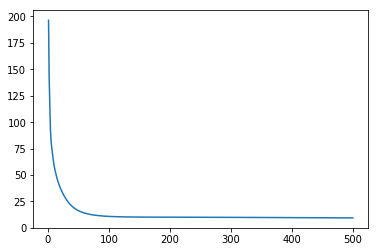

In [14]:
epochs = np.arange(1,501)
plt.plot(epochs,loss1)
plt.show()

In [15]:
for elem in np.array(loss1):
    print(str(elem[0])+',' , end = '')

196.3660916954209,142.30286417767098,117.70130563525572,94.69569600231195,83.48210515565967,77.08913646395361,72.27089667791495,67.85234189643197,63.19929308490474,59.24579920973699,56.220632911636095,53.58032008762,51.197327722578095,48.876468352319485,46.614762876094666,44.64194162720479,42.87166401337471,41.23069018447052,39.669439276829394,38.21866288493695,36.83647227204972,35.52305232799775,34.27130721664939,33.094305669826916,31.968753549907703,30.853565517693198,29.842637451607718,28.858569153303595,27.933108650631972,27.039461674155298,26.192328297727705,25.373437308002504,24.600675101829243,23.852268159390025,23.144644692791754,22.496724177681685,21.87104319384201,21.28458372142161,20.7507709569495,20.20222710481518,19.723293676242967,19.25141088291232,18.827608959832887,18.401534719685973,18.021691485304153,17.63505960449034,17.279677730963684,16.9458527080261,16.629375390277833,16.32676669483387,16.043563994140413,15.773062516661474,15.516355849395042,15.26226241596077,15.0